In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_ATLAS = pd.read_csv('./Dados_Atlas_Digital/atlas_Digital.csv', encoding='latin1', sep=';', low_memory=False)

df_ATLAS.head()

,Protocolo_S2iD,Nome_Municipio,Sigla_UF,regiao,Data_Registro,Data_Evento,Cod_Cobrade,tipologia,descricao_tipologia,grupo_de_desastre,...,PEPL_Ensino (R$),PEPL_total_publico,PEPR_Descricao,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR
0,SC-D-4215406-14110-19910107,Salto Veloso,SC,Sul,07/01/1991,07/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
1,RS-D-4313102-14110-19910112,Nova Palma,RS,Sul,12/01/1991,12/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
2,RS-D-4304952-14110-19910115,Caseiros,RS,Sul,15/01/1991,15/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,SC-D-4208609-14110-19910115,Jaborá,SC,Sul,15/01/1991,15/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,SC-D-4207650-14110-19910118,Iporã do Oeste,SC,Sul,18/01/1991,18/01/1991,14110,"4,00",Estiagem e Seca,Climatológico,...,"0,00","0,00",NaN,"0,00","0,00","0,00","0,00","0,00","0,00","0,00"


In [3]:
df_ATLAS.columns

Index(['Protocolo_S2iD', 'Nome_Municipio', 'Sigla_UF', 'regiao',
       'Data_Registro', 'Data_Evento', 'Cod_Cobrade', 'tipologia',
       'descricao_tipologia', 'grupo_de_desastre', 'Cod_IBGE_Mun',
       'Setores Censitários', 'Status', 'DH_Descricao', 'DH_MORTOS',
       'DH_FERIDOS', 'DH_ENFERMOS', 'DH_DESABRIGADOS', 'DH_DESALOJADOS',
       'DH_DESAPARECIDOS', 'DH_AFETADOS_SECA_ESTIAGEM',
       'DH_total_danos_humanos_diretos', 'DH_OUTROS AFETADOS', 'DM_Descricao',
       'DM_Uni Habita Danificadas', 'DM_Uni Habita Destruidas',
       'DM_Uni Habita Valor', 'DM_Inst Saúde Danificadas',
       'DM_Inst Saúde Destruidas', 'DM_Inst Saúde Valor',
       'DM_Inst Ensino Danificadas', 'DM_Inst Ensino Destruidas',
       'DM_Inst Ensino Valor', 'DM_Inst Serviços Danificadas',
       'DM_Inst Serviços Destruidas', 'DM_Inst Serviços Valor',
       'DM_Inst Comuni Danificadas', 'DM_Inst Comuni Destruidas',
       'DM_Inst Comuni Valor', 'DM_Obras de Infra Danificadas',
       'DM_Obras de 

In [4]:
df_Temporarias = ['Nome_Municipio', 'Sigla_UF', 'regiao', 'Data_Evento', 'descricao_tipologia', 'grupo_de_desastre']

In [5]:
df_ATLAS_temp = df_ATLAS[df_Temporarias]

In [6]:
df_ATLAS_temp.head()

,Nome_Municipio,Sigla_UF,regiao,Data_Evento,descricao_tipologia,grupo_de_desastre
0,Salto Veloso,SC,Sul,07/01/1991,Estiagem e Seca,Climatológico
1,Nova Palma,RS,Sul,12/01/1991,Estiagem e Seca,Climatológico
2,Caseiros,RS,Sul,15/01/1991,Estiagem e Seca,Climatológico
3,Jaborá,SC,Sul,15/01/1991,Estiagem e Seca,Climatológico
4,Iporã do Oeste,SC,Sul,18/01/1991,Estiagem e Seca,Climatológico


In [7]:
desastre_em_SP = df_ATLAS_temp[df_ATLAS_temp['Sigla_UF'] == 'SP']['descricao_tipologia'].value_counts()
print(desastre_em_SP)

descricao_tipologia
Enxurradas                         562
Inundações                         509
Alagamentos                        301
Chuvas Intensas                    293
Movimento de Massa                 275
Vendavais e Ciclones               247
Incêndio Florestal                 233
Estiagem e Seca                    138
Outros                              41
Erosão                              34
Granizo                             26
Onda de Frio                         8
Doenças infecciosas                  7
Onda de Calor e Baixa Umidade        5
Tornado                              3
Rompimento/Colapso de barragens      2
Name: count, dtype: int64


In [8]:
# Enxurrada por cidade
desastre_enxurrada_city = df_ATLAS_temp[
    (df_ATLAS_temp['Sigla_UF'] == 'SP') & 
    (df_ATLAS_temp['descricao_tipologia'] == 'Enxurradas')
]['Nome_Municipio'].value_counts()
print(f'Enxurrada por cidade: {desastre_enxurrada_city}')

print('---------------------------------------------------')

# Inundação por cidade
desastre_inundacoes_city = df_ATLAS_temp[
    (df_ATLAS_temp['Sigla_UF'] == 'SP') & 
    (df_ATLAS_temp['descricao_tipologia'] == 'Inundações')  # Make sure the tipologia is 'Inundações'
]['Nome_Municipio'].value_counts()
print(f'Inundação por cidade: {desastre_inundacoes_city}')

print('---------------------------------------------------')

# Alagamento por cidade
desastre_alagamento_city = df_ATLAS_temp[
    (df_ATLAS_temp['Sigla_UF'] == 'SP') & 
    (df_ATLAS_temp['descricao_tipologia'] == 'Alagamentos')  # Make sure the tipologia is 'Alagamentos'
]['Nome_Municipio'].value_counts()
print(f'Alagamento por cidade: {desastre_alagamento_city}')

print('---------------------------------------------------')

# Chuvas Intensas por cidade
desastre_chuvaIntensa_city = df_ATLAS_temp[
    (df_ATLAS_temp['Sigla_UF'] == 'SP') & 
    (df_ATLAS_temp['descricao_tipologia'] == 'Chuvas Intensas')  # Make sure the tipologia is 'Chuvas Intensas'
]['Nome_Municipio'].value_counts()
print(f'Chuvas Intensas por cidade: {desastre_chuvaIntensa_city}')

Enxurrada por cidade: Nome_Municipio
São Paulo              18
Jacupiranga             7
Registro                7
Sete Barras             6
Sumaré                  6
                       ..
Marabá Paulista         1
Maracaí                 1
Reginópolis             1
Nova Canaã Paulista     1
Mirandópolis            1
Name: count, Length: 279, dtype: int64
---------------------------------------------------
Inundação por cidade: Nome_Municipio
Capivari               12
Mogi das Cruzes        12
Sorocaba               12
Francisco Morato       11
Santo André             9
                       ..
Conchal                 1
Mococa                  1
Praia Grande            1
Rio Grande da Serra     1
Rafard                  1
Name: count, Length: 217, dtype: int64
---------------------------------------------------
Alagamento por cidade: Nome_Municipio
São Paulo              18
São José dos Campos     7
Lins                    7
Rio Claro               6
Jaú                     6
    

In [9]:
def Teste_de_Colunas(tabela1, tabela2, tabela3):
    coluna1 = tabela1.columns
    coluna2 = tabela2.columns
    coluna3 = tabela3.columns

    if (coluna1.equals(coluna2)) and (coluna2.equals(coluna3)):
        print('Colunas possíveis de juntar')
    else:
        print('Colunas diferentes')

In [10]:
df_Rio_Atibaia_2020 = pd.read_csv('./Dados_SAISP/dados_202001010000_P56_Rio_Atibaia_Capta__o_Valinhos__D3_051T_3D_007T__202001010000.csv')
df_Rio_Atibaia_2022 = pd.read_csv('./Dados_SAISP/dados_202201010010_P56_Rio_Atibaia_Capta__o_Valinhos__D3_051T_3D_007T__202201010010.csv')
df_Rio_Atibaia_2024 = pd.read_csv('./Dados_SAISP/dados_202401010010_P56_Rio_Atibaia_Capta__o_Valinhos__D3_051T_3D_007T__202401010010.csv')


print(f'Tabela 1: {df_Rio_Atibaia_2020.columns}')
print(f'Tabela 2: {df_Rio_Atibaia_2022.head()}')
print(f'Tabela 3: {df_Rio_Atibaia_2024.tail()}')

Tabela 1: Index(['Posto', 'DATA', 'Unnamed: 2', 'PLU(mm)', 'FLU(m)', 'Q(m3/s)',
       'Bateria(V)', 'Cota (m)'],
      dtype='object')
Tabela 2:    Posto                  DATA  Unnamed: 2  PLU(mm)  FLU(m)  Q(m3/s)  \
0     56   2022-01-01 00:10:00        29.0    1.326  22.674   12.841   
1     56   2022-01-01 00:20:00        29.0    1.328  22.736   12.690   
2     56   2022-01-01 00:30:00        29.0    1.331  22.830   12.740   
3     56   2022-01-01 00:40:00        29.0    1.335  22.954   12.791   
4     56   2022-01-01 00:50:00        29.0    1.338  23.048   12.740   

   Bateria(V)  Cota (m)  
0     656.876       NaN  
1     656.878       NaN  
2     656.881       NaN  
3     656.885       NaN  
4     656.888       NaN  
Tabela 3:        Posto                  DATA  Unnamed: 2  PLU(mm)  FLU(m)  Q(m3/s)  \
91927     56   2025-09-30 23:20:00         0.0    0.888  10.051   12.640   
91928     56   2025-09-30 23:30:00         0.0    0.888  10.051   12.640   
91929     56   2025-09-30 2

In [11]:
df_Rio_Atibaia = pd.concat([df_Rio_Atibaia_2020, df_Rio_Atibaia_2022, df_Rio_Atibaia_2024], ignore_index=True, join="inner")

df_Rio_Atibaia

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Q(m3/s),Bateria(V),Cota (m)
0,56,2020-01-01 00:00:00,0.0,0.954,11.808,12.816,656.504,NaN
1,56,2020-01-01 00:10:00,0.0,0.954,11.808,12.715,656.504,NaN
2,56,2020-01-01 00:20:00,0.0,0.958,11.916,12.740,656.508,NaN
3,56,2020-01-01 00:30:00,0.0,0.959,11.944,12.690,656.509,NaN
4,56,2020-01-01 00:40:00,0.0,0.954,11.808,12.640,656.504,NaN
...,...,...,...,...,...,...,...,...
302286,56,2025-09-30 23:20:00,0.0,0.888,10.051,12.640,656.438,NaN
302287,56,2025-09-30 23:30:00,0.0,0.888,10.051,12.640,656.438,NaN
302288,56,2025-09-30 23:40:00,0.0,0.888,10.051,12.665,656.438,NaN
302289,56,2025-09-30 23:50:00,0.0,0.889,10.077,12.640,656.439,NaN


In [12]:
df_Rio_Atibaia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302291 entries, 0 to 302290
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Posto       302291 non-null  int64  
 1   DATA        302291 non-null  object 
 2   Unnamed: 2  302066 non-null  float64
 3   PLU(mm)     301861 non-null  float64
 4   FLU(m)      301857 non-null  float64
 5   Q(m3/s)     301982 non-null  float64
 6   Bateria(V)  301804 non-null  float64
 7   Cota (m)    0 non-null       float64
dtypes: float64(6), int64(1), object(1)
memory usage: 18.5+ MB


In [13]:
df_Rio_Atibaia.head()

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Q(m3/s),Bateria(V),Cota (m)
0,56,2020-01-01 00:00:00,0.0,0.954,11.808,12.816,656.504,NaN
1,56,2020-01-01 00:10:00,0.0,0.954,11.808,12.715,656.504,NaN
2,56,2020-01-01 00:20:00,0.0,0.958,11.916,12.740,656.508,NaN
3,56,2020-01-01 00:30:00,0.0,0.959,11.944,12.690,656.509,NaN
4,56,2020-01-01 00:40:00,0.0,0.954,11.808,12.640,656.504,NaN


In [14]:
df_Rio_Atibaia['DATA'] = pd.to_datetime(df_Rio_Atibaia['DATA'])

df_Rio_Atibaia.head()

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Q(m3/s),Bateria(V),Cota (m)
0,56,2020-01-01 00:00:00,0.0,0.954,11.808,12.816,656.504,NaN
1,56,2020-01-01 00:10:00,0.0,0.954,11.808,12.715,656.504,NaN
2,56,2020-01-01 00:20:00,0.0,0.958,11.916,12.740,656.508,NaN
3,56,2020-01-01 00:30:00,0.0,0.959,11.944,12.690,656.509,NaN
4,56,2020-01-01 00:40:00,0.0,0.954,11.808,12.640,656.504,NaN


In [15]:
df_Rio_Atibaia['horario'] = df_Rio_Atibaia['DATA'].dt.hour
df_Rio_Atibaia['DATA'] = pd.to_datetime(df_Rio_Atibaia['DATA'])

df_Rio_Atibaia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302291 entries, 0 to 302290
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Posto       302291 non-null  int64         
 1   DATA        302291 non-null  datetime64[ns]
 2   Unnamed: 2  302066 non-null  float64       
 3   PLU(mm)     301861 non-null  float64       
 4   FLU(m)      301857 non-null  float64       
 5   Q(m3/s)     301982 non-null  float64       
 6   Bateria(V)  301804 non-null  float64       
 7   Cota (m)    0 non-null       float64       
 8   horario     302291 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1)
memory usage: 19.6 MB


In [16]:
df_Rio_Atibaia.tail()

,Posto,DATA,Unnamed: 2,PLU(mm),FLU(m),Q(m3/s),Bateria(V),Cota (m),horario
302286,56,2025-09-30 23:20:00,0.0,0.888,10.051,12.640,656.438,NaN,23
302287,56,2025-09-30 23:30:00,0.0,0.888,10.051,12.640,656.438,NaN,23
302288,56,2025-09-30 23:40:00,0.0,0.888,10.051,12.665,656.438,NaN,23
302289,56,2025-09-30 23:50:00,0.0,0.889,10.077,12.640,656.439,NaN,23
302290,56,2025-10-01 00:00:00,0.0,0.889,10.077,12.564,656.439,NaN,0


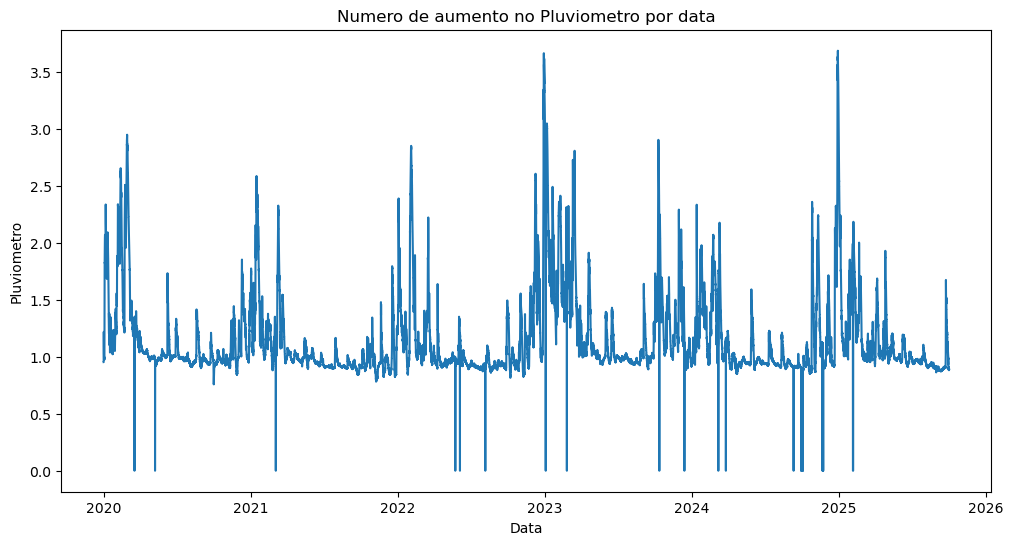

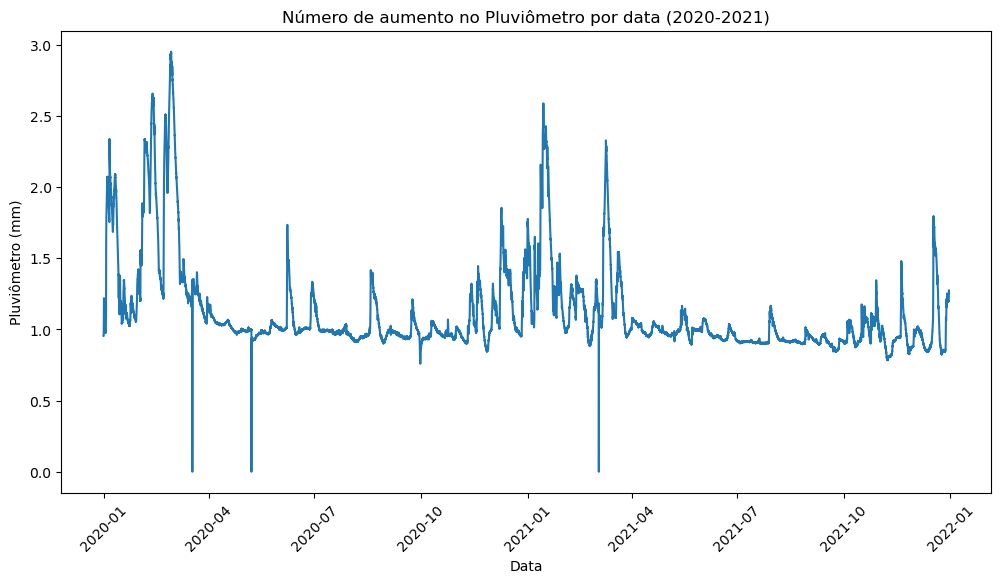

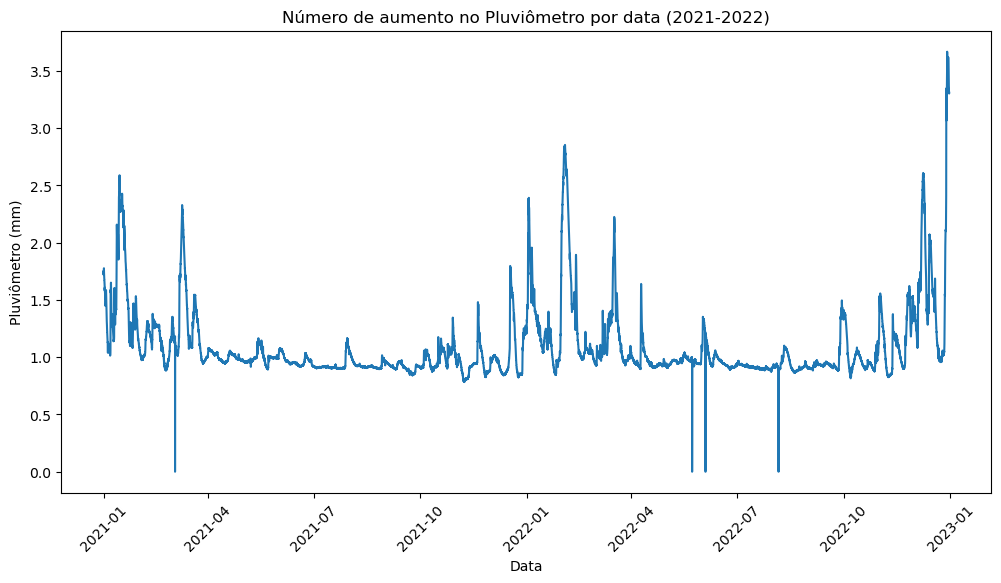

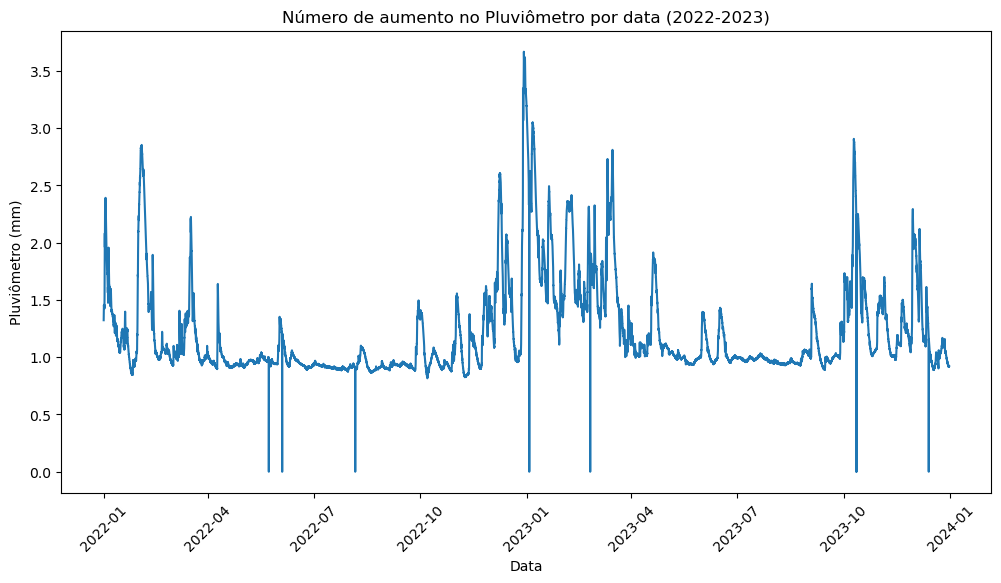

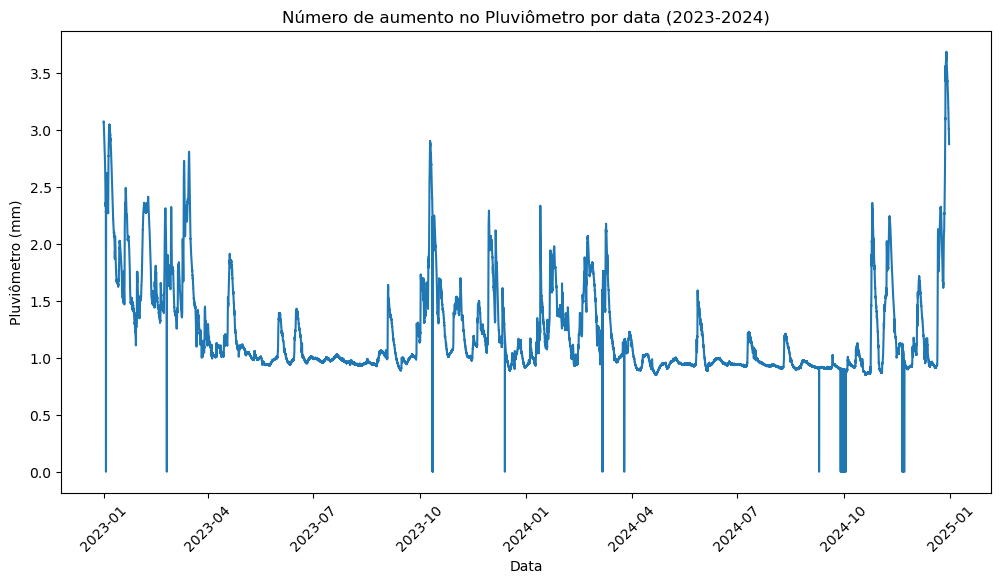

In [19]:
df_tempo_Rio_Atibaia = df_Rio_Atibaia.groupby('DATA')['PLU(mm)'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_tempo_Rio_Atibaia, x='DATA', y='PLU(mm)')
plt.title('Numero de aumento no Pluviometro por data')
plt.xlabel('Data')
plt.ylabel('Pluviometro')

plt.show()

# Filtrar entre 2020-01-01 e 2021-12-31
df_filtrado = df_tempo_Rio_Atibaia[
    (df_tempo_Rio_Atibaia['DATA'] >= '2020-01-01') &
    (df_tempo_Rio_Atibaia['DATA'] <= '2021-12-31')
]

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtrado, x='DATA', y='PLU(mm)')
plt.title('Número de aumento no Pluviômetro por data (2020-2021)')
plt.xlabel('Data')
plt.ylabel('Pluviômetro (mm)')
plt.xticks(rotation=45)
plt.show()

# Filtrar entre 2020-01-01 e 2021-12-31
df_filtrado = df_tempo_Rio_Atibaia[
    (df_tempo_Rio_Atibaia['DATA'] >= '2021-01-01') &
    (df_tempo_Rio_Atibaia['DATA'] <= '2022-12-31')
]

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtrado, x='DATA', y='PLU(mm)')
plt.title('Número de aumento no Pluviômetro por data (2021-2022)')
plt.xlabel('Data')
plt.ylabel('Pluviômetro (mm)')
plt.xticks(rotation=45)
plt.show()

# Filtrar entre 2020-01-01 e 2021-12-31
df_filtrado = df_tempo_Rio_Atibaia[
    (df_tempo_Rio_Atibaia['DATA'] >= '2022-01-01') &
    (df_tempo_Rio_Atibaia['DATA'] <= '2023-12-31')
]

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtrado, x='DATA', y='PLU(mm)')
plt.title('Número de aumento no Pluviômetro por data (2022-2023)')
plt.xlabel('Data')
plt.ylabel('Pluviômetro (mm)')
plt.xticks(rotation=45)
plt.show()

# Filtrar entre 2020-01-01 e 2021-12-31
df_filtrado = df_tempo_Rio_Atibaia[
    (df_tempo_Rio_Atibaia['DATA'] >= '2023-01-01') &
    (df_tempo_Rio_Atibaia['DATA'] <= '2024-12-31')
]

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df_filtrado, x='DATA', y='PLU(mm)')
plt.title('Número de aumento no Pluviômetro por data (2023-2024)')
plt.xlabel('Data')
plt.ylabel('Pluviômetro (mm)')
plt.xticks(rotation=45)
plt.show()